In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#그래프에 한글 표현하기
import  matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family = font_name)

#마이너스 표시하기
import  matplotlib as mlp
mlp.rcParams["axes.unicode_minus"]  = False

In [2]:
#데이터  준비
df = pd.read_csv("전처리완성본/지역연령별 데이터 전처리 완성본.csv")
df.index = df["행정구역"]
data = df.iloc[:,1:]
data

,20대,30대,40대,남_20대,남_30대,남_40대,여_20대,여_30대,여_40대
행정구역,,,,,,,,,
고등동,1197,1069,1242,634,625,684,563,444,558
곡선동,5270,5207,4887,2811,2979,2739,2459,2228,2148
광교동,11633,14907,16240,5369,7103,7956,6264,7804,8284
권선동,11773,12377,12644,6030,6189,6245,5743,6188,6399
금곡동,6247,6662,8107,3205,3306,4034,3042,3356,4073
망포동,7977,10775,11334,4152,5240,5620,3825,5535,5714
매교동,893,884,805,486,476,461,407,408,344
매산동,1868,1633,1398,1023,916,809,845,717,589
매탄동,15843,12974,15879,8582,6964,7739,7261,6010,8140


In [3]:
#인, 영, 매, 권 동만 따로 뽑아오기
df = data.loc[["인계동","영통동","매탄동","권선동"],:]
df["총인구"] = [37844, 97465, 96599, 76751]
df["나머지연령대"] = df["총인구"]- df["20대"]-df["30대"]-df["40대"]
df = df[['20대', '30대', '40대','나머지연령대','총인구', '남_20대', '남_30대', '남_40대', '여_20대', '여_30대',
       '여_40대']]

df_1 = df.iloc[:,:4]

df_1



,20대,30대,40대,나머지연령대
행정구역,,,,
인계동,7820,7190,6205,16629
영통동,17012,16705,17453,46295
매탄동,15843,12974,15879,51903
권선동,11773,12377,12644,39957


<Figure size 864x504 with 0 Axes>

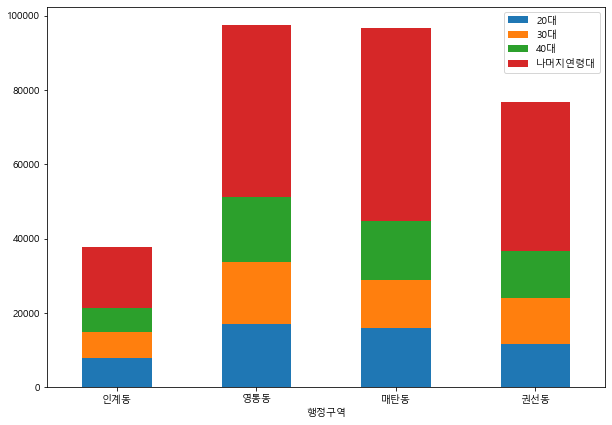

In [12]:

plt.figure(figsize=(12,7))
df_1.plot(kind="bar",stacked=True,figsize=(10,7))
plt.xticks(rotation=0)
plt.savefig('image/모든동별 연령대분포.png',dpi = 200, bbox_inches='tight')

In [10]:
#인구율=각 항목/20대+30대+40대
df_영 = df[df.index=="영통동"].T

df_영["인구율%"] = ((df_영["영통동"]/df_영.loc["총인구","영통동"])*100).round(1)

df_영 = df_영[0:4]
df_영
# df_인.sort_values("인구율%", ascending=False)

행정구역,영통동,인구율%
20대,17012,17.5
30대,16705,17.1
40대,17453,17.9
나머지연령대,46295,47.5


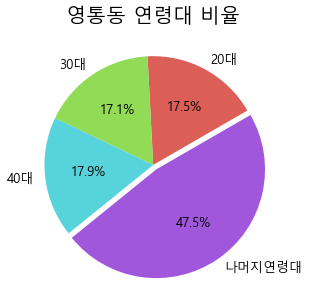

In [13]:
# pie chart

#내림차순 데이터 변수지정
df_yopi = df_영

#영통동 연령대 비율
plt.figure(figsize=(10,5))
colors = sns.color_palette('hls',len(df_영.index))


labels = df_yopi.index[:4]
sizes =  df_yopi['인구율%'].values[:4]
explode = (0, 0, 0,0.05)  
#fig, ax = plt.subplots()
plt.pie(sizes, labels=labels, 
        explode=explode, # explode=파이가 떨어진 정도
        autopct='%1.1f%%',
         startangle=30,
       textprops={'fontsize': 13},colors=colors)



plt.title('영통동 연령대 비율', fontsize=20)
plt.savefig('image/영통동 연령대 비율.png',dpi = 200, bbox_inches='tight')

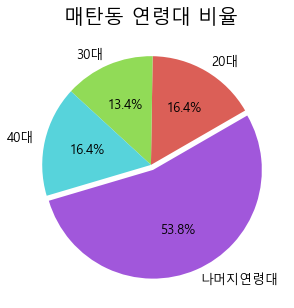

In [14]:
#인구율=각 항목/20대+30대+40대
df_매 = df[df.index=="매탄동"].T

df_매["인구율%"] = ((df_매["매탄동"]/df_매.loc["총인구","매탄동"])*100).round(1)

df_매 = df_매[0:4]
df_매
# df_인.sort_values("인구율%", ascending=False)



# pie chart

#내림차순 데이터 변수지정
df_mapi = df_매

#영통동 연령대 비율
plt.figure(figsize=(10,5))
colors = sns.color_palette('hls',len(df_매.index))


labels = df_mapi.index[:4]
sizes =  df_mapi['인구율%'].values[:4]
explode = (0, 0, 0,0.05)  
#fig, ax = plt.subplots()
plt.pie(sizes, labels=labels, 
        explode=explode, # explode=파이가 떨어진 정도
        autopct='%1.1f%%',
         startangle=30,
       textprops={'fontsize': 13},colors = colors)



plt.title('매탄동 연령대 비율', fontsize=20)
plt.savefig('image/매탄동 연령대 비율.png',dpi = 200, bbox_inches='tight')

Text(0.5, 1.0, '인계동 연령대 비율')

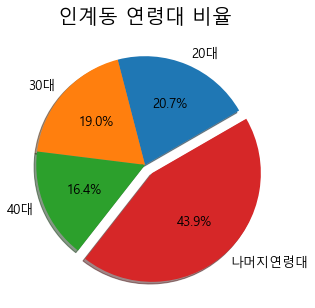

In [176]:
#인구율=각 항목/20대+30대+40대
df_인 = df[df.index=="인계동"].T

df_인["인구율%"] = ((df_인["인계동"]/df_인.loc["총인구","인계동"])*100).round(1)

df_인 = df_인[0:4]
df_인
# df_인.sort_values("인구율%", ascending=False)



# pie chart

#내림차순 데이터 변수지정
df_inpi = df_인

#영통동 연령대 비율
plt.figure(figsize=(10,5))
colors = sns.color_palette('hls',len(df_인.index))


labels = df_inpi.index[:4]
sizes =  df_inpi['인구율%'].values[:4]
explode = (0, 0, 0,0.1)  
#fig, ax = plt.subplots()
plt.pie(sizes, labels=labels, 
        explode=explode, # explode=파이가 떨어진 정도
        autopct='%1.1f%%',
        shadow=True, startangle=30,
       textprops={'fontsize': 13})



plt.title('인계동 연령대 비율', fontsize=20)

Text(0.5, 1.0, '권선동 연령대 비율')

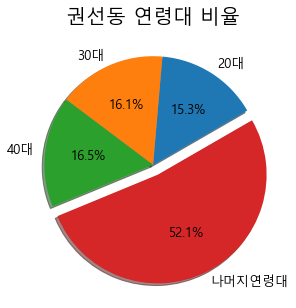

In [177]:
#인구율=각 항목/20대+30대+40대
df_권 = df[df.index=="권선동"].T

df_권["인구율%"] = ((df_권["권선동"]/df_권.loc["총인구","권선동"])*100).round(1)

df_권 = df_권[0:4]
df_권
# df_인.sort_values("인구율%", ascending=False)



# pie chart

#내림차순 데이터 변수지정
df_kwpi = df_권

#영통동 연령대 비율
plt.figure(figsize=(10,5))
colors = sns.color_palette('hls',len(df_권.index))


labels = df_kwpi.index[:4]
sizes =  df_kwpi['인구율%'].values[:4]
explode = (0, 0, 0,0.1)  
#fig, ax = plt.subplots()
plt.pie(sizes, labels=labels, 
        explode=explode, # explode=파이가 떨어진 정도
        autopct='%1.1f%%',
        shadow=True, startangle=30,
       textprops={'fontsize': 13})



plt.title('권선동 연령대 비율', fontsize=20)

In [42]:
#인구율=각 항목/20대+30대+40대
df_인 = df[df.index=="인계동"].T

df_인["인구율%"] = ((df_인["인계동"]/df_인.loc["총인구","인계동"])*100).round(1)

df_인
# df_인.sort_values("인구율%", ascending=False)

행정구역,인계동,인구율%
20대,7820,20.7
30대,7190,19.0
40대,6205,16.4
나머지연령대,16629,43.9
총인구,37844,100.0
남_20대,3876,10.2
남_30대,3962,10.5
남_40대,3208,8.5
여_20대,3944,10.4
여_30대,3228,8.5
